In [27]:
#******************************************************************************************************************************
#                                                                                                                             *
#                         Linear Discriminant Analysis (LDA) with TensorFlow                                                  *
#                                                                                                                             *
#     - This script implements Linear Discriminant Analysis (LDA) using SciPy for solving the eigenvalue problem.             *
#     - LDA is a supervised dimensionality reduction technique that finds linear combinations of features                     *
#       which best separate different classes by maximizing the ratio of between-class variance to within-class variance.     *
#     - The script includes the LDA class definition with methods for fitting the model to the data and transforming          *
#       the data to the new feature space defined by the linear discriminants. Additionally, it provides visualization        *
#       functions for scatter plots, histograms, and 2D plots of the transformed data. The example demonstrates               *
#       loading a heart disease dataset, fitting the LDA model, transforming the data, and visualizing the results.           *
#                                                                                                                             *
#******************************************************************************************************************************


In [28]:
import numpy as np
import pandas as pd
from scipy.linalg import inv
from scipy.linalg import eigh
import matplotlib.pyplot as plt

In [29]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components                                        # Number of components to keep
        self.linear_discriminants = None                                        # Placeholder for linear discriminants

    def fit(self, X, y):
        n_features = X.shape[1]                                                 # Number of features in the dataset
        class_labels = np.unique(y)                                             # Unique class labels
        mean_overall = np.mean(X, axis=0)                                       # Mean of the overall dataset
        S_W = np.zeros((n_features, n_features))                                # Initialize within-class scatter matrix
        S_B = np.zeros((n_features, n_features))                                # Initialize between-class scatter matrix

        for c in class_labels:
            X_c = X[y == c]                                                     # Samples belonging to class c
            mean_c = np.mean(X_c, axis=0)                                       # Mean of class c
            S_W += (X_c - mean_c).T.dot(X_c - mean_c)                           # Update within-class scatter matrix
            n_c = X_c.shape[0]                                                  # Number of samples in class c
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)          # Difference between class mean and overall mean
            S_B += n_c * (mean_diff).dot(mean_diff.T)                           # Update between-class scatter matrix

        S_W_inv = inv(S_W)                                                      # Solve the eigenvalue problem using SciPy
        eigvals, eigvecs = eigh(S_W_inv.dot(S_B))

        sorted_indices = np.argsort(eigvals)[::-1]                              # Select the top n_components eigenvectors
        top_indices = sorted_indices[:self.n_components]
        self.linear_discriminants = eigvecs[:, top_indices].T

        # Print linear discriminants
        print("\n\n*****************************************************************************************************************************")
        print("Linear Discriminants:")
        print(self.linear_discriminants)

        # Print S_W and S_B
        print("\n\n*****************************************************************************************************************************")
        print("\nWithin-Class Scatter Matrix (S_W):\n", S_W)
        print("\n\n*****************************************************************************************************************************")
        print("\nBetween-Class Scatter Matrix (S_B):\n", S_B)
        print("\n\n*****************************************************************************************************************************\n\n")

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

In [30]:
def banner():
    print("""
******************************************************************************************************************************
*                                         Linear Discriminant Analysis (LDA)                                                 *
*                                                                                                                            *
*     Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique used to find the linear          *
*     combinations of features that best separate two or more classes. LDA maximizes the ratio of between-class variance     *
*     to within-class variance in the data, ensuring maximum separability.                                                   *
*                                                                                                                            *
*             - S_W: Within-class scatter matrix                                                                             *
*             - S_B: Between-class scatter matrix                                                                            *
*             - Linear Discriminants: Directions maximizing the separation between classes                                   *
*                                                                                                                            *
*     LDA is particularly useful for classification problems and visualizing high-dimensional data in lower dimensions.      *
*                                                                                                                            *
*     Usage:                                                                                                                 *
*             1. Load your dataset into a pandas DataFrame.                                                                  *
*             2. Extract features and labels from the dataset.                                                               *
*             3. Initialize the LDA class with the number of components (n_components) to retain.                            *
*             4. Fit the LDA model using the 'fit' method with your data matrix X and labels y.                              *
*             5. Transform the data into the new feature space using the 'transform' method.                                 *
*             6. Visualize the results using the provided plotting functions (scatter, histogram, contour, 2D plot).         *
*             7. Experiment with different values of n_components to find the optimal number of dimensions for your          *
*                analysis.                                                                                                   *
*                                                                                                                            *
******************************************************************************************************************************
    """)


banner()
dataset = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")              # Load the dataset
X = dataset.drop(columns=["target"]).values                                     # Extract features
y = dataset["target"].values                                                    # Extract labels
lda = LDA(n_components=2)                                                       # Initialize and fit LDA
lda.fit(X, y)
X_lda = lda.transform(X)


******************************************************************************************************************************
*                                         Linear Discriminant Analysis (LDA)                                                 *
*                                                                                                                            *
*     Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique used to find the linear          *
*     combinations of features that best separate two or more classes. LDA maximizes the ratio of between-class variance     *
*     to within-class variance in the data, ensuring maximum separability.                                                   *
*                                                                                                                            *
*             - S_W: Within-class scatter matrix                                                              

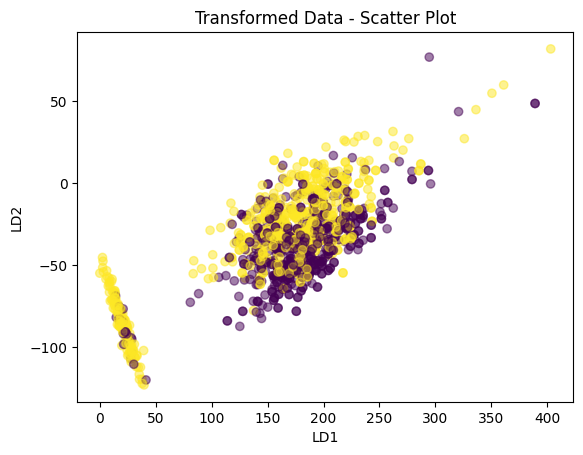

In [31]:
# Scatter Plot
def plot_scatter(X_lda, y):
    plt.figure()
    plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', alpha=0.5)
    plt.title('Transformed Data - Scatter Plot')
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    plt.show()


plot_scatter(X_lda, y)

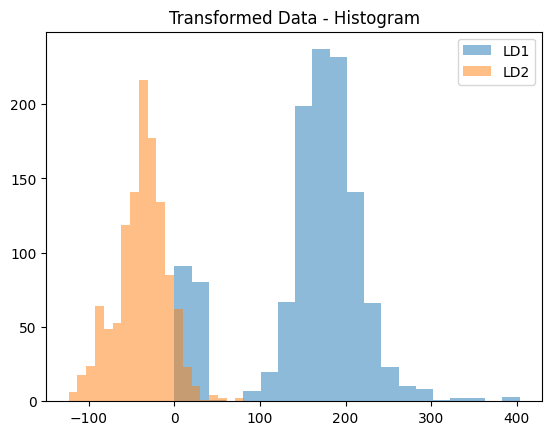

In [32]:
# Histogram
def plot_histogram(X_lda):
    plt.figure()
    for i in range(lda.n_components):
        plt.hist(X_lda[:, i], bins=20, alpha=0.5, label=f'LD{i+1}')
    plt.title('Transformed Data - Histogram')
    plt.legend()
    plt.show()


plot_histogram(X_lda)

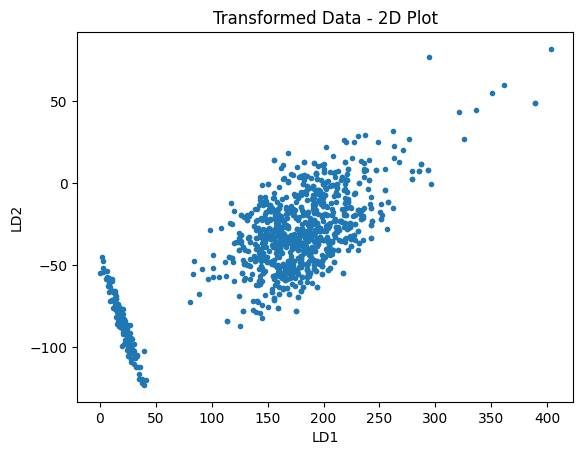

In [33]:
# 2D Plot
def plot_2d(X_lda):
    if lda.n_components >= 2:
        plt.figure()
        plt.plot(X_lda[:, 0], X_lda[:, 1], 'o', markersize=3)
        plt.title('Transformed Data - 2D Plot')
        plt.xlabel('LD1')
        plt.ylabel('LD2')
        plt.show()


plot_2d(X_lda)